In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

# load the data
df = pd.read_excel('g7_year.xlsx')
df.head()

,Country,Counterpart,2019,2020
0,Canada,France,-4175.191646,-2335.734882
1,Canada,Germany,-10537.701286,-8865.241961
2,Canada,Italy,-5069.001253,-4352.574238
3,Canada,Japan,-3699.770683,-1528.604207
4,Canada,United Kingdom,7638.728477,8858.071229


In [2]:
#Event types
df['Counterpart'].unique()

array(['France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States', 'Canada', nan], dtype=object)

In [3]:
#remove na's
df = df.dropna()
df['Counterpart'].unique()

array(['France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States', 'Canada'], dtype=object)

In [4]:
#rename 2019 to balance, convert to float, and remove year 2020
df.rename(columns={'2019': 'Balance'}, inplace=True)
df['Balance'] = df['Balance'].astype(float)
df = df[['Country', 'Counterpart', 'Balance']]
print(df)
print(df['Balance'].dtype)

           Country     Counterpart       Balance
0           Canada          France  -4175.191646
1           Canada         Germany -10537.701286
2           Canada           Italy  -5069.001253
3           Canada           Japan  -3699.770683
4           Canada  United Kingdom   7638.728477
5           Canada   United States  94289.836331
6           France          Canada   1140.456931
7           France         Germany -36164.467475
8           France           Italy -10450.647087
9           France           Japan   1784.941423
10          France  United Kingdom  11304.075739
11          France   United States  10689.717056
12         Germany          Canada   6762.009760
13         Germany          France  41000.171466
14         Germany           Italy  10893.812791
15         Germany           Japan   4563.273084
16         Germany  United Kingdom  43234.778088
17         Germany   United States  73036.266728
18           Italy          Canada   3072.991151
19           Italy  

In [5]:
df['Balance_rank'] = df.groupby('Country')['Balance'].rank(ascending=False)
df = df.sort_values(by=['Country','Balance_rank'])
df

,Country,Counterpart,Balance,Balance_rank
5,Canada,United States,94289.836331,1.0
4,Canada,United Kingdom,7638.728477,2.0
3,Canada,Japan,-3699.770683,3.0
0,Canada,France,-4175.191646,4.0
2,Canada,Italy,-5069.001253,5.0
1,Canada,Germany,-10537.701286,6.0
10,France,United Kingdom,11304.075739,1.0
11,France,United States,10689.717056,2.0
9,France,Japan,1784.941423,3.0
6,France,Canada,1140.456931,4.0


In [6]:
import networkx as nx

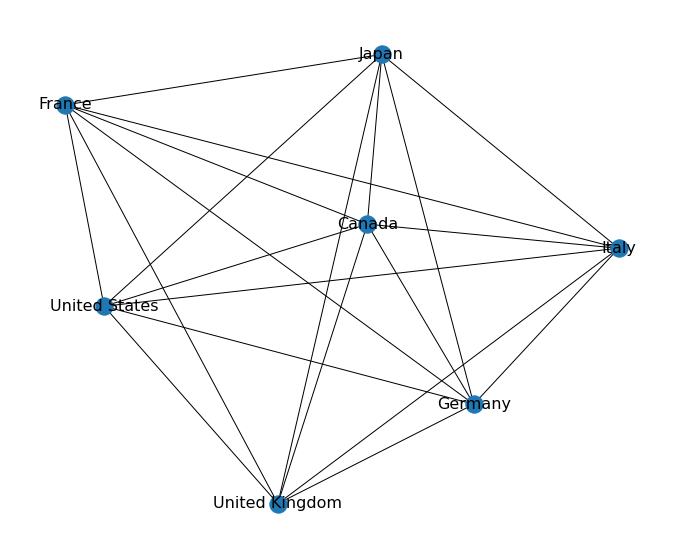

In [9]:
G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row[0], row[1], weight=row[3])
    
plt.subplots(figsize=(12, 10))
pos=nx.spring_layout(G)
nx.draw(G, pos=pos, font_size=16)
nx.draw_networkx_labels(G, pos=pos, font_size=16)
plt.axis('off')
plt.show()

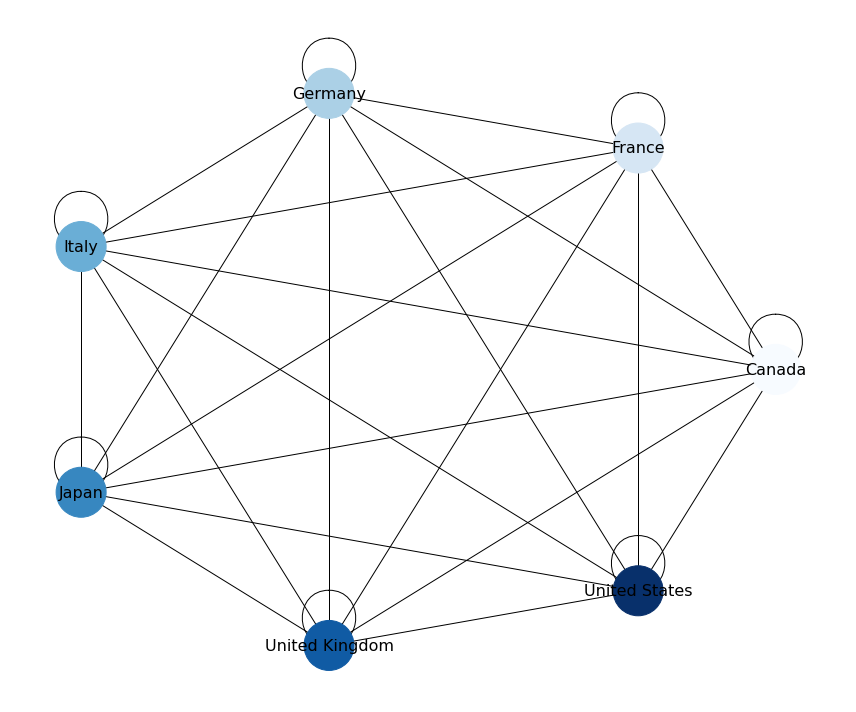

In [8]:
G = nx.cycle_graph(df['Country'])
#G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row[0], row[1], weight=row[3])
    
plt.subplots(figsize=(12,10))
pos = nx.circular_layout(G)
nx.draw_networkx_labels(G,pos=pos,font_size=16)
nx.draw(G, pos=pos, node_color=range(7), node_size=2500, cmap=plt.cm.Blues)
plt.tight_layout()
plt.show()